# PROJECT 31: SURGEAI TWEET DATA EXPLORATORY DATA ANALYSIS

## Author: Ebuwa Evbuoma-Fike
## Last Edited: 07/16/2022

# INSTALLATION PROCEDURES

In [189]:
#Install required packages
!pip install scikit_learn gensim pyldavis textstat

     |████████████████████████████████| 105 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 4.8 MB/s eta 0:00:01


In [10]:
#Install required packages
!pip install pillow nltk wordcloud spacy emoji pandas


     |████████████████████████████████| 197 kB 4.0 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=87f56a95b0158fe403e9a350018c47b42a2f39ca8b685855f1f4de479ffb42e1
  Stored in directory: /Users/ebuwa/Library/Caches/pip/wheels/0e/d1/c5/63b511b700c9da5a62bbfc758dd4a3fd9541df51b5db0694b0
Successfully built emoji


In [114]:
#Import python packages
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import gensim
import string
import emoji
import pandas as pd
import re, string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#Assign functions within nltk package
ps = nltk.PorterStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")
nltk.download("punkt")

stop_words = set(stopwords.words("english"))

import warnings
warnings.filterwarnings("ignore")

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

#

[nltk_data] Downloading package wordnet to /Users/ebuwa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ebuwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ebuwa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ebuwa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Read in SurgeAI csv as traindata

In [40]:
#Import dataset and assign tweet_id as index column
traindata = pd.read_csv("/Volumes/GoogleDrive/My Drive/Time at Brown School/Summer 2022/Correlation One Data Science for All/Resources/project31/data/train.csv",
                       index_col= "tweet_id")


In [41]:
#Inspect
traindata.head()

,worker_id,task_id,task_response_id,is_reviewed,review_score,text,username,bio,Categorize the tweet
tweet_id,,,,,,,,,
1540795861126352898,4TG67HVWJNDP,909fc038-d4fd-45f0-b849-d975760f163d,02dcb39a-c525-418a-9198-5c08d354935a,True,NaN,It getting pregnant endangers your life......\...,AChristhope,Humankind is neither humane nor kind. Creator ...,Pro-life
1540784525864669186,2AZWNZRTVACE,0dcd0bda-127d-4b57-a479-08efc85fb902,031abcc4-deb2-42b2-8b36-979f77d006c6,False,NaN,@bluekat323 @leighmatsell @caambers @Robthefro...,LegalLatino2022,Left January 2021. Starting anew. Love all ani...,Pro-life
1540795218097688576,6CNHTCG6W6XM,8617b170-4d3a-4789-b020-c51c0ce1e7c9,035e1a0b-fec5-4c88-81a4-6a79ba4c1d2f,False,NaN,@JoeBiden Dont you have the power to make an e...,Sploiv,i dont fuckin know anymore,Pro-choice
1540795712610258944,7R2NKCJQNXPP,851318f8-7671-4f45-9a98-58ebe7013de1,037c1004-9dd9-4bce-a792-adffb278be86,False,NaN,https://t.co/2vL1gxc3P3,AuntyLush,Judge jury and old joyce ~~ She/her,Pro-choice
1540796129725427715,X6P6DQRXD62A,a42881d0-a01a-4c7c-acfa-9d21434b59b0,03d7bc4f-4fd0-4658-bf0f-3151150d6d41,False,NaN,The overturning of Roe was not an attack on wo...,parlermaid,NaN,Pro-life


In [42]:
#Inspect the dataset dimensions
print(traindata.shape)

(1025, 9)


In [43]:
#Inspect column labels
traindata.columns

Index(['worker_id', 'task_id', 'task_response_id', 'is_reviewed',
       'review_score', 'text', 'username', 'bio', 'Categorize the tweet'],
      dtype='object')

In [44]:
# Identify and count missing values by column
traindata.apply(pd.isnull).sum()


worker_id                  0
task_id                    0
task_response_id           0
is_reviewed                0
review_score            1025
text                       0
username                   0
bio                      159
Categorize the tweet       0
dtype: int64

In [45]:
# Identify and count missing values by column (expressed as percentages)
traindata.apply(pd.isnull).sum()/traindata.shape[0]


worker_id               0.000000
task_id                 0.000000
task_response_id        0.000000
is_reviewed             0.000000
review_score            1.000000
text                    0.000000
username                0.000000
bio                     0.155122
Categorize the tweet    0.000000
dtype: float64

# DATA MANIPULATION

# Subset analytical variables 

In [46]:
df = traindata[["is_reviewed","text", "username", "bio", "Categorize the tweet"]]

In [47]:
df = df.rename(columns = {"Categorize the tweet": "sentiments"})

In [48]:
df.describe()

,is_reviewed,text,username,bio,sentiments
count,1025,1025,1025,866,1025
unique,2,1025,1024,865,2
top,False,It getting pregnant endangers your life......\...,Chrismikoichi,looking to build up a following . I'll follow ...,Pro-choice
freq,1014,1,2,2,744


In [50]:
df.info()
#there are a lot of null values in the "bio" variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 1540795861126352898 to 1540796104039510017
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   is_reviewed  1025 non-null   bool  
 1   text         1025 non-null   object
 2   username     1025 non-null   object
 3   bio          866 non-null    object
 4   sentiments   1025 non-null   object
dtypes: bool(1), object(4)
memory usage: 41.0+ KB


In [74]:
#Inspect rows where "bio" is null (missing)
df[pd.isnull(df["bio"])]

,is_reviewed,text,username,bio,sentiments,Num_word_text
tweet_id,,,,,,
1540796129725427715,False,The overturning of Roe was not an attack on wo...,parlermaid,NaN,Pro-life,21
1540796064650903552,False,@DarkNookShop @Cubs_Michael @GoodManOnceSaid @...,bankiemag,NaN,Pro-life,16
1540795950876315648,False,@D_B_Harrison Very similar to the White Pastor...,RizNJ,NaN,Pro-choice,20
1540795858748428288,False,"@kxntie @karlarod_ So you say ""where people ca...",stevencrouch211,NaN,Pro-choice,20
1540795946589626368,False,@RepValDemings How did you become a mother and...,ChaWheelman,NaN,Pro-life,16
...,...,...,...,...,...,...
1540794407515000833,False,@ShotoSimp98 @SassyValkyrie @Snowy_Doe @war_up...,mafia2198,NaN,Pro-life,13
1540796033109590018,False,@BigEcavin @FekoLand @BBCWorld And let’s get o...,Okbutwhytho5,NaN,Pro-choice,19
1540796110234681344,False,@LeahKonen To those who say that you shouldn’t...,crisscrossdude,NaN,Pro-choice,24


In [69]:
#Subset a df_bio, a dataframe with missing bio observations only
df_bio = df[pd.isnull(df["bio"])].copy()

In [73]:
#Inspect
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1540796129725427715 to 1540795262490247168
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   is_reviewed    159 non-null    bool  
 1   text           159 non-null    object
 2   username       159 non-null    object
 3   bio            0 non-null      object
 4   sentiments     159 non-null    object
 5   Num_word_text  159 non-null    int64 
dtypes: bool(1), int64(1), object(4)
memory usage: 7.6+ KB


In [76]:
#Group tweets by sentiment and count, assign as object biotemp
biotemp = df_bio.groupby("sentiments").count()["text"].reset_index().sort_values(by="text",ascending=False)
print(biotemp)

   sentiments  text
0  Pro-choice    91
1    Pro-life    68


In [77]:
# Examine distribution of tweets in biotemp object, color coded
biotemp.style.background_gradient(cmap= "Purples") # Most of the tweets with missing bios tweet are pro-choice
#Question: How do we proceed with this information? 

,sentiments,text
0,Pro-choice,91
1,Pro-life,68


# Analyzing Text Statistics

## Frequency counts by sentiment 

In [49]:
temp = df.groupby("sentiments").count()["text"].reset_index().sort_values(by="text",ascending=False)
print(temp)

   sentiments  text
0  Pro-choice   744
1    Pro-life   281


In [51]:
# Examine distribution of tweets, color coded
temp.style.background_gradient(cmap= "Purples")

,sentiments,text
0,Pro-choice,744
1,Pro-life,281


Text(0.5, 1.0, 'Abortion Sentiments by Tweet Count')

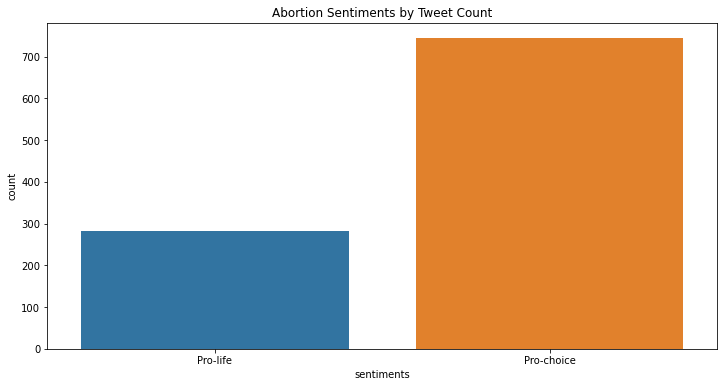

In [55]:
#Plot bar chart
plt.figure(figsize=(12,6))
plot = sns.countplot(x="sentiments",data=df)
plot.set_title("Abortion Sentiments by Tweet Count")

In [58]:
#Plot funnel chart
fig = go.Figure(go.Funnelarea(
    text =temp.sentiments,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel Chart of Sentiment Distribution by Tweet Count"}
    ))
fig.show()

## Distribution of Character Counts: Number of Characters in Each Tweet

<AxesSubplot:>

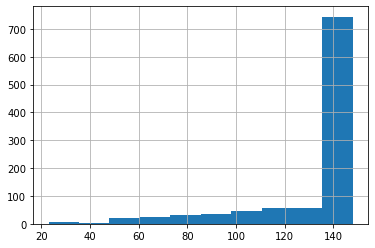

In [83]:
#Plot histogram
df["text"].str.len().hist()
#Tweets range between 20 and 145 characters in length

## Distribution of Word Counts

### Distribution of Word Counts: Number of Words in Each Tweet

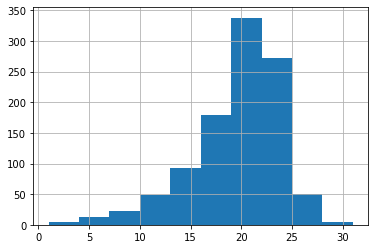

In [86]:
#Create a word counter histogram function
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

#Plot histogram
plot_word_number_histogram(df["text"]) #The number of words per tweet ranges from 1 to 30

### Distribution of Word Counts: Number of Words in Each Tweet by Sentiment

In [184]:
#Subset dataframe for words per tweet and sentiment

df["Num_word_text"] = df["text"].apply(lambda x:len(str(x).split())) 

df[df.sentiments == "Pro-life"]["Num_word_text"]


tweet_id
1540795861126352898    18
1540784525864669186    13
1540796129725427715    21
1540795450243969024    20
1540796064650903552    16
                       ..
1540795856181514242    25
1540796067624587266    17
1540795803081531394    15
1540794043117862912    22
1540796198063202305    20
Name: Num_word_text, Length: 281, dtype: int64

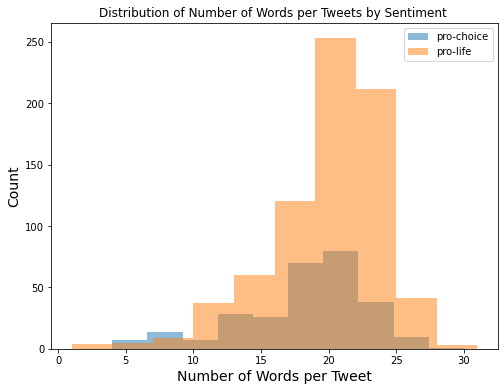

In [185]:
#Create two distributions based on sentiment
data1 = df[df.sentiments == "Pro-life"]["Num_word_text"]
data2 = df[df.sentiments == "Pro-choice"]["Num_word_text"]

#Plot a Histogram of Words per Tweets by Sentiment
plt.figure(figsize=(8,6))
plt.hist(data1, bins=10, alpha=0.5, label="pro-choice")
plt.hist(data2, bins=10, alpha=0.5, label="pro-life")
plt.xlabel("Number of Words per Tweet", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of Number of Words per Tweets by Sentiment ")
plt.legend(loc= "upper right")


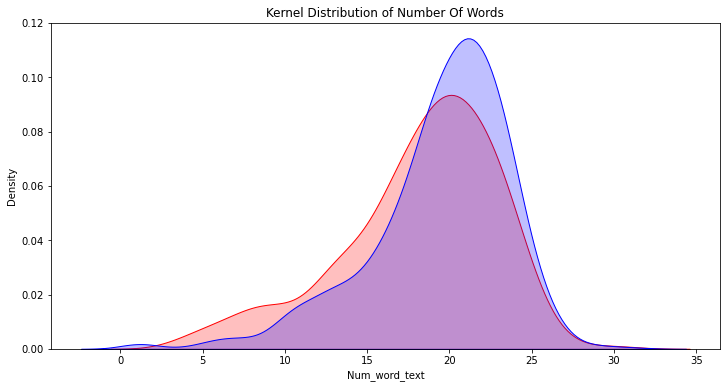

In [186]:
#Plot a Kernel Plot
plt.figure(figsize=(12,6))
p1=sns.kdeplot(data1, shade=True, color="r").set_title('Kernel Distribution of Number Of Words')
p1=sns.kdeplot(data2, shade=True, color="b")


## Distribution of Average Word Length in Each Tweet

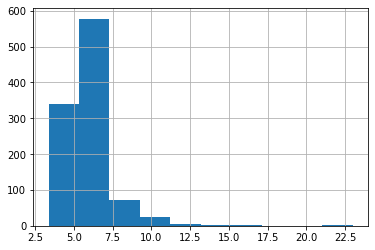

In [88]:
#Create an average word length histogram function
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

#Plot histogram
plot_word_length_histogram(df["text"]) #The average word length ranges between 3 to 11

## Distribution of Stopwords in Each Tweet

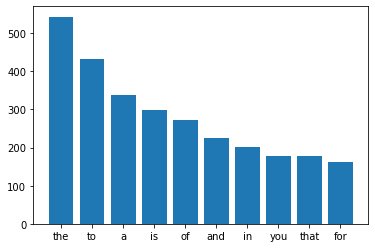

In [89]:
#Create corpus for nltk library
corpus=[]

#Create function to plot stopwords
def plot_top_stopwords_barchart(text):
    stop_words =set(stopwords.words('english'))
    df_stop = df["text"].str.split()
    df_stop = df_stop.values.tolist()
    corpus = [word for i in df_stop for word in i]

    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dic[word]+=1
        
       
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] #top ten stop words
    x,y=zip(*top)
    plt.bar(x,y)

#Plot bar chart 
plot_top_stopwords_barchart(df["text"]) # "the", "to" and "a"

## Distribution of Non-Stop Words in Each Tweet

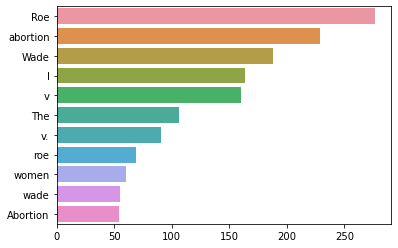

In [92]:
#Identify what words other than stop words occur frequently
#Create function to plot non-stop words
def plot_top_non_stopwords_barchart(text):
    stop_words =set(stopwords.words('english'))
    
    df_nstop = df["text"].str.split()
    df_nstop = df_nstop.values.tolist()
    corpus = [word for i in df_nstop for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop_words):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    
#Plot bar graph
plot_top_non_stopwords_barchart(df["text"]) #"Roe", "abortion" and "Wade" predominate

#Question: What do we do about sentence case? E.g. "abortion" and "Abortion", "Wade" and "wade" etc?

# Ngram Exploration

## Bigrams

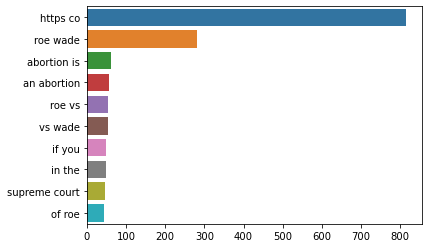

In [96]:
#load count vectorizer function
from sklearn.feature_extraction.text import CountVectorizer

#Create a function to plot bigrams as a bar chart
def plot_top_ngrams_barchart(text, n=2):
    stop_words =set(stopwords.words('english'))

    df_ngram = df["text"].str.split()
    df_ngram = df_ngram.values.tolist()
    corpus = [word for i in df_ngram for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

#Plot bigrams as bar chart
plot_top_ngrams_barchart(df["text"],2) #bigram

#Question: https co is the most frequently occuring because every tweet has a unique html link. What to do?
#After that, "roe wade" is by far the most common bigram

## Trigrams

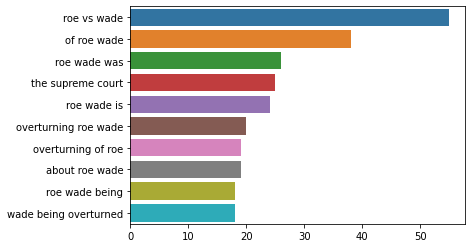

In [102]:
#Plot trigrams as bar chart
plot_top_ngrams_barchart(df["text"],3) #trigrams

#"roe vs wade" and"of roe wade" are the most common

# Topic modeling exploration with pyLDAvis

Preprocess data by:

Tokenization: the process by which sentences are converted to a list of tokens or words.

Removal of stopwords

Lemmatization: reduces the inflectional forms of each word into a common base or root.

Conversion to the bag of words model: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus

## Preprocessing Data

In [111]:
#Create a function called preprocess_tweet
def preprocess_tweet(df):
    corpus=[]
    ps = nltk.PorterStemmer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    for tweets in df["text"]:
        words = [w for w in word_tokenize(tweets) if (w not in stop_words)]
        
        words = [lemmatizer.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus = preprocess_tweet(df)

#Recall:
#ps = nltk.PorterStemmer()
#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#lemmatizer = nltk.stem.WordNetLemmatizer()

In [115]:
#Create a bag of words model using gensim package
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [116]:
#Create Latent Dirichlate Allocation(LDA) Model
#Each tweet is represented by the distribution of topics and each topic is represented by the distribution of words.

lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.048*"http" + 0.020*"abortion" + 0.013*"Roe" + 0.012*"Wade" + 0.011*"right" + 0.007*"woman" + 0.005*"The" + 0.005*"n\'t" + 0.004*"You" + 0.004*"What"'),
 (1,
  '0.026*"http" + 0.022*"Roe" + 0.021*"Wade" + 0.015*"abortion" + 0.005*"get" + 0.005*"wade" + 0.004*"roe" + 0.004*"would" + 0.004*"Abortion" + 0.004*"n\'t"'),
 (2,
  '0.052*"http" + 0.019*"abortion" + 0.015*"Roe" + 0.013*"Wade" + 0.012*"woman" + 0.007*"The" + 0.006*"wade" + 0.006*"roe" + 0.005*"right" + 0.005*"get"'),
 (3,
  '0.050*"http" + 0.016*"Roe" + 0.016*"abortion" + 0.015*"Wade" + 0.009*"right" + 0.008*"The" + 0.006*"woman" + 0.006*"people" + 0.006*"overturned" + 0.005*"decision"')]

In [157]:
#Visualize LDA Model results using pyLDAvis

import pyLDAvis


def get_lda_objects(text):
    nltk.download("stopwords")    
    stop_words = set(stopwords.words("english"))

    
    def _preprocess_text(text):
        corpus=[]
        ps = nltk.PorterStemmer()
        lemmatizer = nltk.stem.WordNetLemmatizer()
        for tweets in text:
            words = [w for w in word_tokenize(tweets) if (w not in stop_words)]

            words = [lemmatizer.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus = _preprocess_text(text)
    
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

In [165]:

lda_model, bow_corpus, dic = get_lda_objects(df["text"])

[nltk_data] Downloading package stopwords to /Users/ebuwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
lda_model.show_topics()

[(0,
  '0.038*"http" + 0.019*"Roe" + 0.018*"Wade" + 0.018*"abortion" + 0.012*"right" + 0.007*"woman" + 0.007*"roe" + 0.007*"wade" + 0.006*"overturned" + 0.004*"overturning"'),
 (1,
  '0.048*"http" + 0.018*"abortion" + 0.014*"Roe" + 0.011*"Wade" + 0.009*"woman" + 0.007*"right" + 0.005*"say" + 0.004*"like" + 0.004*"You" + 0.004*"wade"'),
 (2,
  '0.050*"http" + 0.027*"abortion" + 0.009*"Roe" + 0.008*"n\'t" + 0.008*"Wade" + 0.006*"people" + 0.005*"The" + 0.005*"right" + 0.005*"get" + 0.004*"life"'),
 (3,
  '0.045*"http" + 0.025*"Roe" + 0.023*"Wade" + 0.013*"The" + 0.011*"woman" + 0.006*"right" + 0.006*"abortion" + 0.005*"Court" + 0.005*"Abortion" + 0.005*"Supreme"')]

In [167]:
pyLDAvis.prepare(lda_model, bow_corpus, dic)

#Question: Can someone debug this? I suspect there are issues with the package itself as it is still in beta

TypeError: prepare() missing 2 required positional arguments: 'vocab' and 'term_frequency'

# Wordcloud

In [168]:
#Create a function called plot_wordcloud
def plot_wordcloud(text):
    nltk.download("stopwords")
    stop_words =set(stopwords.words("english"))
    
    def _preprocess_text(text):
        corpus=[]
        ps = nltk.PorterStemmer()
        lemmatizer = nltk.stem.WordNetLemmatizer()
        for tweets in text:
            words = [w for w in word_tokenize(tweets) if (w not in stop_words)]

            words = [lemmatizer.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus = _preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color= "white",
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud = wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /Users/ebuwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


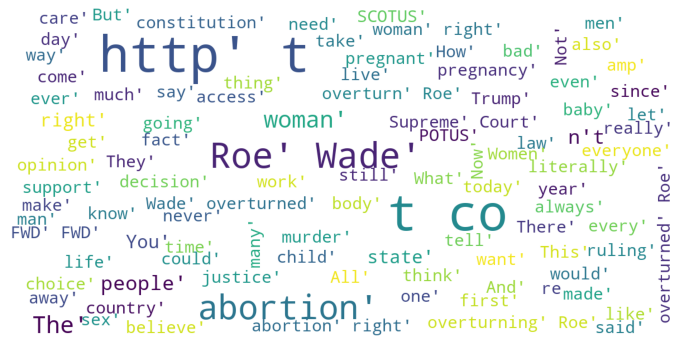

In [170]:
#Plot wordcloud
plot_wordcloud(df["text"]) #Are there parameters we should adjust?

# Sentiment Analysis

Using VADER or Valence Aware Dictionary and Sentiment Reasoner is a rule/lexicon-based, open-source sentiment analyzer pre-built library, protected under the MIT license.

VADER sentiment analysis class returns a dictionary that contains the probabilities of the text for being positive, negative and neutral. Then we can filter and choose the sentiment with most probability.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ebuwa/nltk_data...


<BarContainer object of 3 artists>

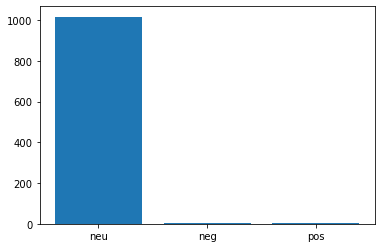

In [171]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sid = SentimentIntensityAnalyzer()

#Create function get_vader_score
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

df["polarity"]= df["text"].\
    map(lambda x: get_vader_score(x))
polarity = df["polarity"].replace({0:'neg',1:'neu',2:'pos'})

#Plot bar chart of neutral, negative or positive sentiment
plt.bar(polarity.value_counts().index,
        polarity.value_counts()) 

#Most of our tweets are neutral

# Named Entity Recognition

See spacy entity types here: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [175]:
# Download pre-trained English language models in spacy library

import spacy
nlp = spacy.load("en_core_web_sm")

In [176]:
#Create a function called ner
def ner(text):
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

ent = df["text"].\
     apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]

counter = Counter(ent)
count = counter.most_common()

<AxesSubplot:>

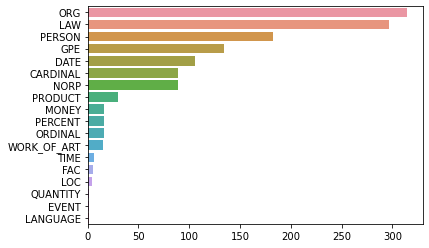

In [177]:
#Visualize the distribution of entities
x,y = map(list,zip(*count))
sns.barplot(x = y,y = x)

#Companies, agencies, institutions (ORG), Named documents made into laws (LAW), Persons (including fictional) (PERSON), and
#Countries, cities and states (GPE) dominate tweets


<AxesSubplot:>

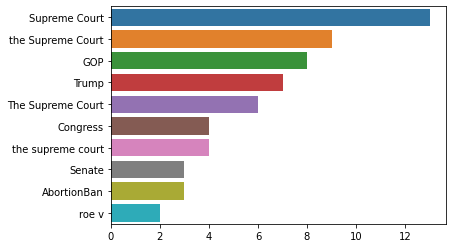

In [178]:
#Create a function to identify the most common tokens per entity, starting with "ORG"
def ner(text,ent = "ORG"):
    doc = nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

org = df["text"].apply(lambda x: ner(x))
org = [i for x in org for i in x]
counter = Counter(org)

#Plot a bar chart
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

#Question: Issues of synonyms arise again?

<AxesSubplot:>

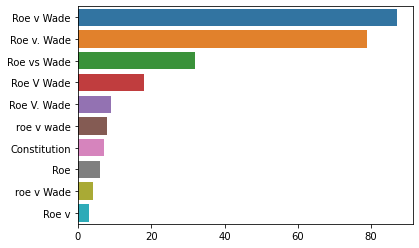

In [179]:
#Repeat above sequence for "LAW" entity
law = df["text"].apply(lambda x: ner(x,"LAW"))
law = [i for x in law for i in x]
counter = Counter(law)

#Plot a bar chart
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

<AxesSubplot:>

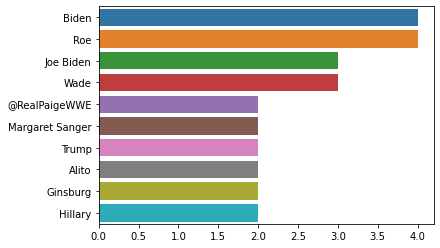

In [180]:
#Repeat above sequence for "PERSON" entity
per = df["text"].apply(lambda x: ner(x,"PERSON"))
per = [i for x in per for i in x]
counter = Counter(per)

#Plot a bar chart
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)
#Interesting that Roe is categorized under "LAW" (it *is* a ruling) and "PERSON" (a person was named in the ruling)
#Question: And who is @RealPaigeWWE??

# Exploration Through Parts of Speech Tagging

Parts of speech (POS) tagging assigns part of speech labels to words in a sentence. There are eight main parts of speech:

Noun (NN)- Joseph, London, table, cat, teacher, pen, city

Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is

Adjective(JJ)- beautiful, happy, sad, young, fun, three

Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow

Preposition (IN)- at, on, in, from, with, near, between, about, under

Conjunction (CC)- and, or, but, because, so, yet, unless, since, if

Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this

Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!


In [182]:
#Create a function called plot_parts_of_speech_barchart

def plot_parts_of_speach_barchart(text):
    nltk.download("averaged_perceptron_tagger")

    def _get_pos(text):
        pos = nltk.pos_tag(word_tokenize(text))
        pos = list(map(list,zip(*pos)))[1]
        return pos
    
    tags = text.apply(lambda x : _get_pos(x))
    tags = [x for l in tags for x in l]
    counter = Counter(tags)
    x,y = list(map(list,zip(*counter.most_common(7))))

    sns.barplot(x = y,y = x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ebuwa/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


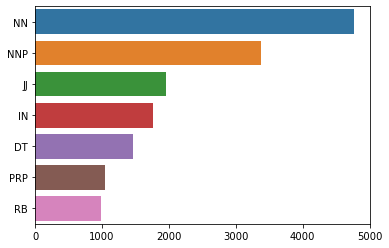

In [183]:
#Plot bar chart of parts of speech
plot_parts_of_speach_barchart(df["text"])

#As expected, nouns predominate the tweets

<AxesSubplot:>

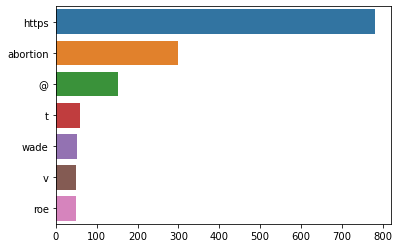

In [187]:
#Create a function get_adjs to identify which singular noun most commonly occurs in tweets
def get_adjs(text):
    adj = []
    pos = nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag == "NN":
            adj.append(word)
    return adj


words = df["text"].apply(lambda x : get_adjs(x))
words = [x for l in words for x in l]
counter = Counter(words)

#Plot bar chart
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x)
#The https issue comes to haunt us once more! But, "abortion" is second highest occuring single noun

# Exploration Through Text Complexity

<AxesSubplot:>

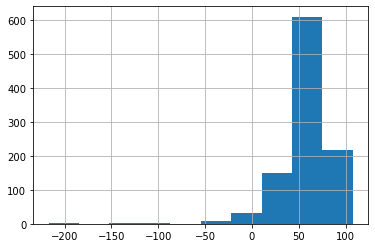

In [190]:
#Using Flesch-Kincaid Grade Levels (FKGL), widely used in the health policy domain
#FKGL = 0.39 * (total words/ totalsentences)+ 11.8 (total syllables/total words) -15.59

from textstat import flesch_reading_ease

df["text"].\
   apply(lambda x : flesch_reading_ease(x)).hist() 
#50 is around the 10th to 12th grade level. Fairly difficult to read.

Code Atrribution:
Shahul, E.S. (2022). Exploratory Data Analysis for Natural Language Processing: A Complete Guide to Python Tools. https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

Data Source:
SurgeAI. (2022). Dataset of Roe v. Wade Tweets, Labeled by Abortion Stance https://app.surgehq.ai/projects/bc68b398-2e11-4361-a84f-5e9abde9ade8/results_ng?token=K2JgvEuvDQClFp-6